In [45]:
import sklearn
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import missingno as msno
from sklearn.preprocessing import FunctionTransformer
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [4]:
water=pd.read_csv('water_potability.csv')
water.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
water.isna().mean() * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

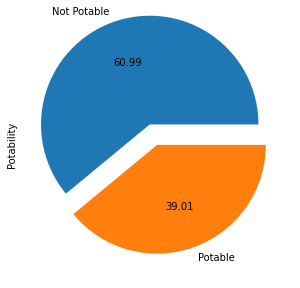

In [11]:
plt.figure(figsize = (15,5))
my_explode = [0.2,0]
my_labels = ['Not Potable', 'Potable']
water['Potability'].value_counts().plot(kind = 'pie',autopct = '%.2f',explode= my_explode, labels = my_labels)

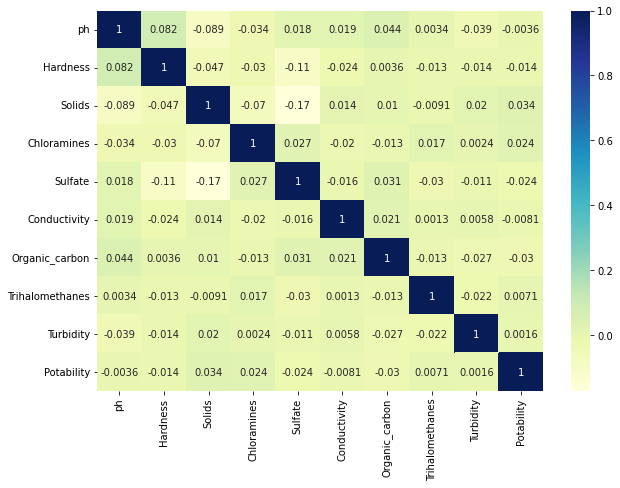

In [18]:
plt.figure(figsize=(10,7))
corr = water.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

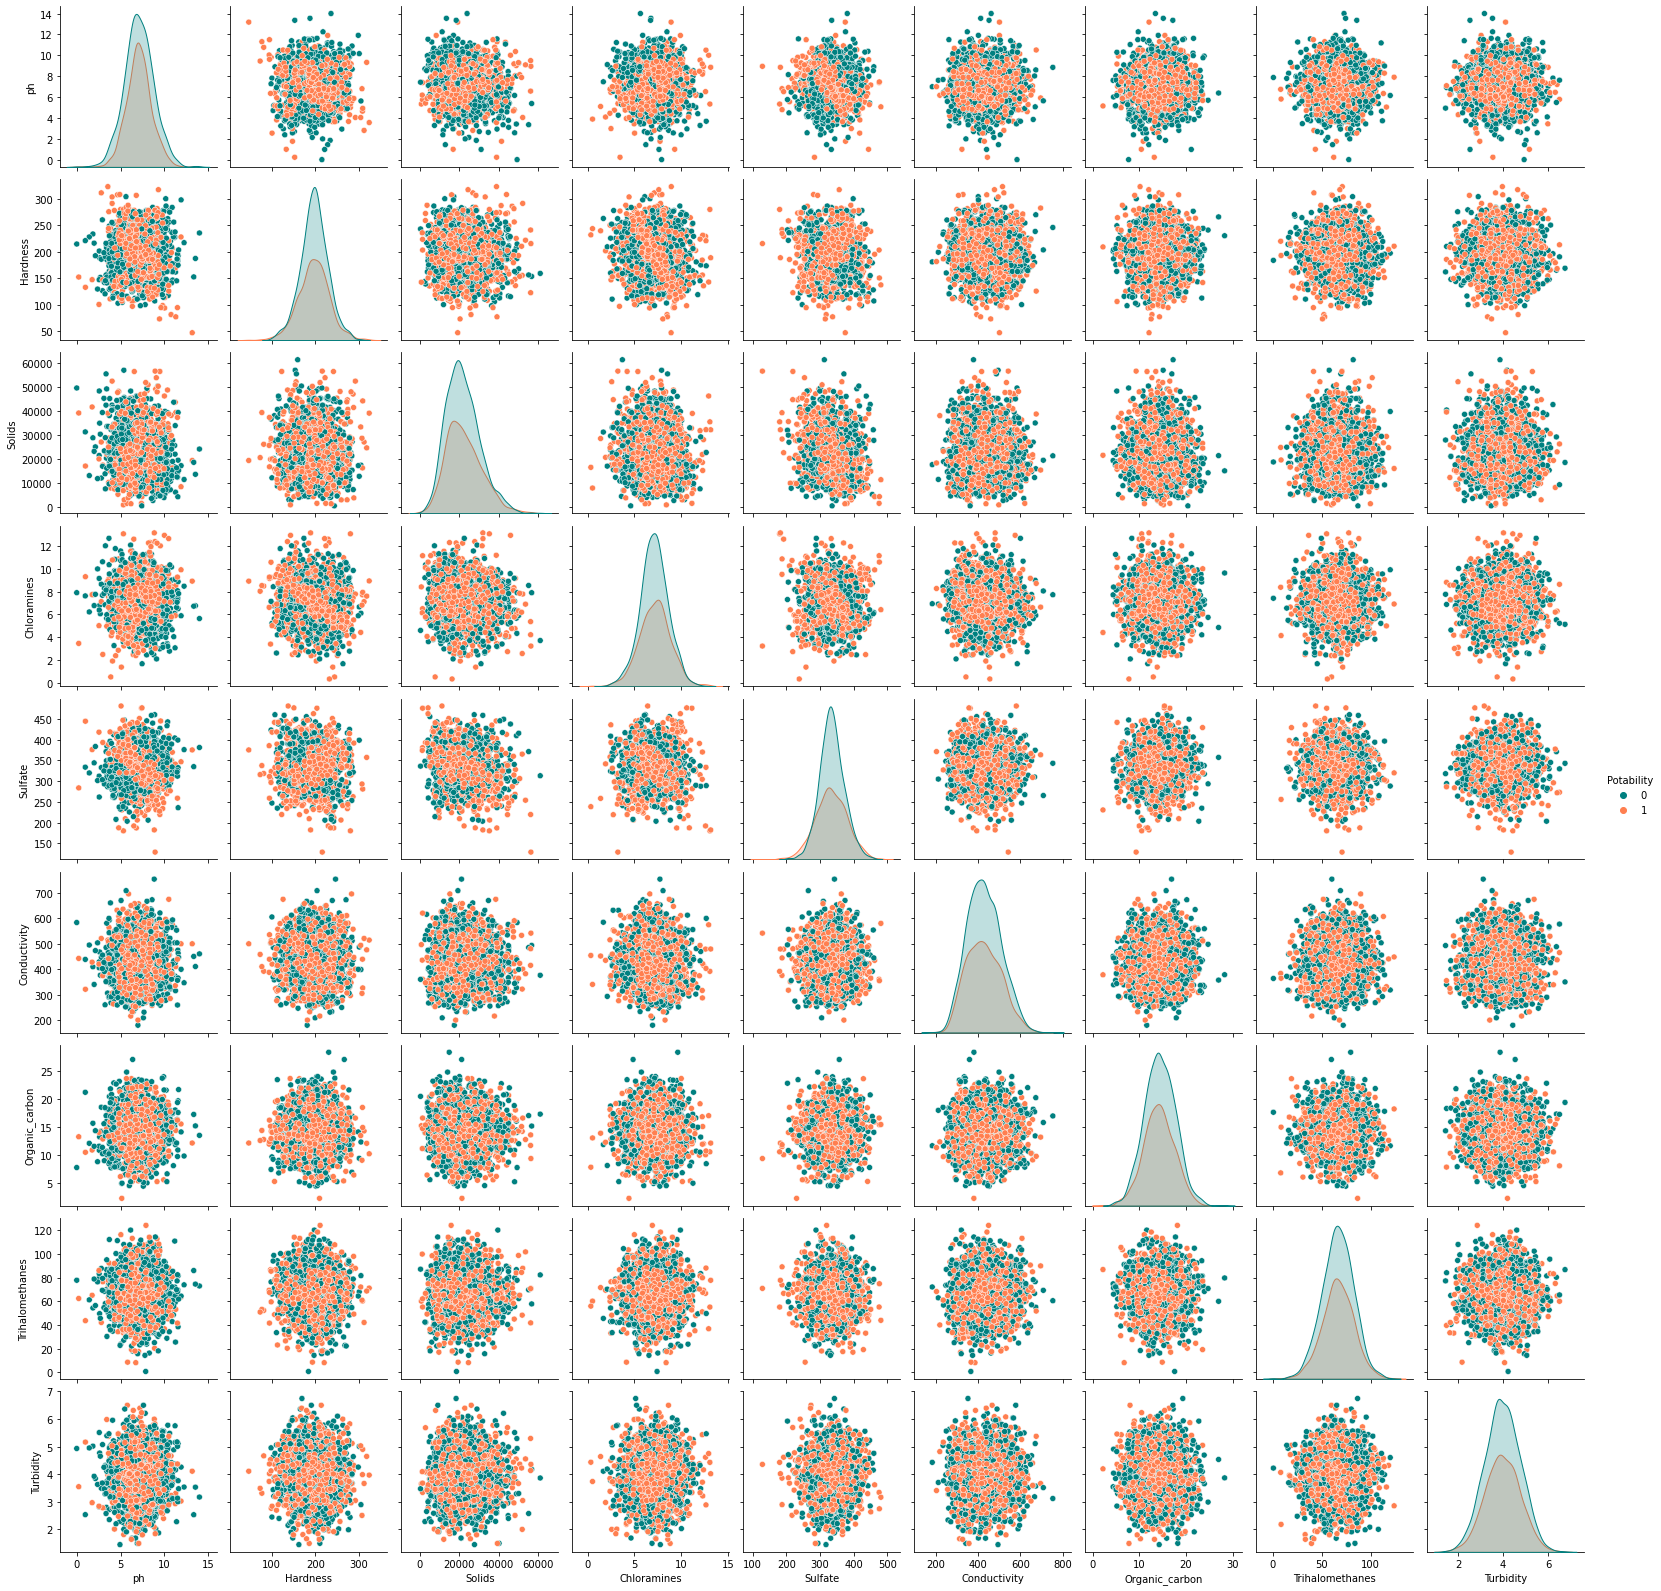

In [20]:
sns.pairplot(data = water,hue = 'Potability',palette=['teal','coral'])

In [22]:
print('Median of ph',water['ph'].median(), '| Mean of ph', water['ph'].mean()) 
print('Median of Sulfate ', water['Sulfate'].median(), '| Mean of Sulfate', water['Sulfate'].mean())
print('Median of Trihalomethanes' ,water['Trihalomethanes'].median(),'| Mean of Trihalomethanes' ,water['Trihalomethanes'].mean())

Median of ph 7.036752103833548 | Mean of ph 7.080794504276835
Median of Sulfate  333.073545745888 | Mean of Sulfate 333.7757766108135
Median of Trihalomethanes 66.62248509808484 | Mean of Trihalomethanes 66.39629294676803


In [23]:
water['ph'].fillna(water['ph'].median(),inplace = True)
water['Sulfate'].fillna(water['Sulfate'].median(),inplace = True)
water['Trihalomethanes'].fillna(water['Trihalomethanes'].median(),inplace = True)

In [29]:
water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [31]:
X = water.drop(columns ='Potability')
y = water['Potability']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 12)

In [104]:
a=[]

**Decision Tree**

In [92]:
accs = []
for i in range(1,10):
   clf = tree.DecisionTreeClassifier(random_state=123,max_depth=i) #tworzymy drzewa o różnych głębokościach
   clf.fit(X_train, y_train) #dopasowujemy je na danych treningowych
   accs.append(clf.score(X_test,y_test)) #i liczymy dokładność na zbiorze testowym 
print(accs)
a.append(accs)

[0.6036585365853658, 0.5945121951219512, 0.6189024390243902, 0.614329268292683, 0.6082317073170732, 0.6173780487804879, 0.6265243902439024, 0.5990853658536586, 0.6265243902439024]


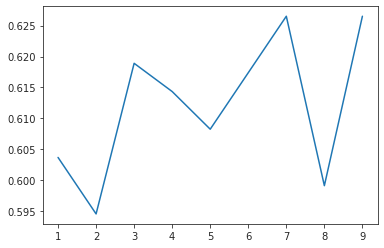

In [93]:

plt.plot(range(1,10), accs)
plt.show()

In [105]:
dt = DecisionTreeClassifier(random_state=123,max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test) 
b=accuracy_score(y_test,y_pred)
a.append(b)

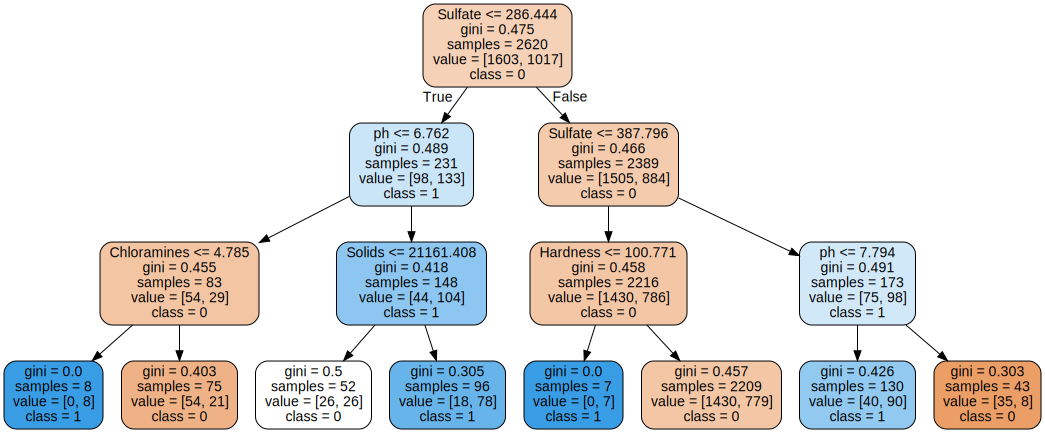

In [63]:
names = np.array(water.columns)
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=names[ :-1],  
                                class_names=['0','1'],
                                filled=True,rounded = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


**Random forest**

In [106]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=2, random_state=12)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 
b=accuracy_score(y_test,y_pred)
a.append(b)

**Gradient Boosting Classifier**

In [107]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test) 
b=accuracy_score(y_test,y_pred)
a.append(b)

**Logistic Regression**

In [108]:
log= LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
y_pred = log.predict(X_test) 
b=accuracy_score(y_test,y_pred)
a.append(b)

KNN dla n=3

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
y_pred = knn.predict(X_test) 
y_pred=pd.Series(y_pred).astype(int)
b=accuracy_score(y_test,y_pred)
a.append(b)

KNN dla n=5

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=5).fit(X_train,y_train)
y_pred = knn.predict(X_test) 
y_pred=pd.Series(y_pred).astype(int)
b=accuracy_score(y_test,y_pred)
a.append(b)

In [100]:
modele=["Decision Tree",'Random Forest','Gradient Boosting Clasifier','Logistic Regression','KNN, n=3',"KNN, n=5"]

In [111]:
a

[0.6189024390243902,
 0.6798780487804879,
 0.635670731707317,
 0.6021341463414634,
 0.5914634146341463,
 0.600609756097561]

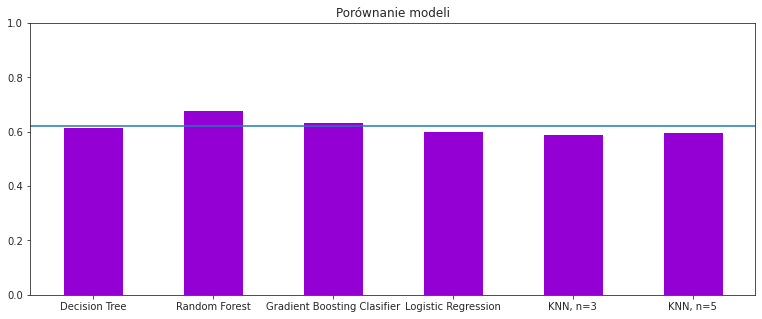

In [129]:
fig = plt.figure(figsize = (13, 5))
plt.bar(modele,a,color =('darkviolet'),
        width = 0.5)
plt.title("Porównanie modeli")
plt.ylim([0,1])
plt.axhline(y=np.nanmean(a))
plt.show()